In [1]:

import sys

sys.path.insert(0, '/home/george/Projects/Python/bind-af2-embed/src')

# Import dependencies
%load_ext autoreload
%autoreload 2

import pandas as pd
from config import AppConfig
from plots import Plots

### Read predictions files

In [61]:
tag = '202207051137_CNN1D_EMBEDDINGS'

config = AppConfig()
predictions_path = config.get_ml_predictions_path()
predictions_path = predictions_path / tag / 'validation_total.csv'
df = pd.read_csv(str(predictions_path))

In [5]:
counts = df[['target', 'prediction']].value_counts()
tp = counts.loc[(1,1)] / sum(counts)
fp = counts.loc[(0,1)] / sum(counts)
tn = counts.loc[(0,0)] / sum(counts)
fn = counts.loc[(1,0)] / sum(counts)

In [6]:
df[df.target == 1]

,tag,protd_id,position,ligand,target,prediction,cutoff,ri,prob,loss
393,test,O25094,33,small,1.0,1,0.5,1.026,0.557,0.000
397,test,O25094,37,small,1.0,1,0.5,0.396,0.522,0.000
450,test,O25094,90,small,1.0,1,0.5,0.180,0.510,0.000
451,test,O25094,91,small,1.0,1,0.5,0.864,0.548,0.000
452,test,O25094,92,small,1.0,0,0.5,0.486,0.473,0.000
...,...,...,...,...,...,...,...,...,...,...
250662,test,Q9HAN9,185,binding,1.0,0,0.5,3.996,0.278,627.031
250691,test,Q9HAN9,214,binding,1.0,0,0.5,8.874,0.007,2245.562
250695,test,Q9HAN9,218,binding,1.0,0,0.5,5.400,0.200,1334.799
250696,test,Q9HAN9,219,binding,1.0,0,0.5,3.600,0.300,862.029


In [45]:
df.loss.mean()

136.207361801911

/tmp/ipykernel_7867/3335055868.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


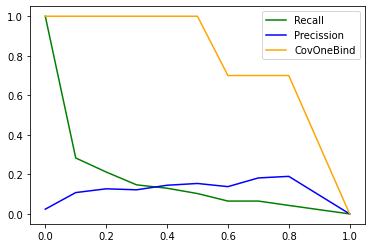

In [64]:
import numpy as np
from ml.common import Performance
import matplotlib.pyplot as plt

cutoffs = df.cutoff.unique()
rec = []
prec = []
covonebind = []
for cutoff in cutoffs:
    performance = Performance.df_to_performance(df[df.cutoff==cutoff])
    rec.append(performance['rec_total'])
    prec.append(performance['prec_total'])
    covonebind.append(performance['covonebind_total'])

fig, ax = plt.subplots()
ax.plot(cutoffs, rec,color='green', label='Recall')
ax.plot(cutoffs, prec,color='blue', label='Precission')
ax.plot(cutoffs, covonebind,color='orange', label = "CovOneBind")
ax.legend()
fig.show()

In [46]:
df1 = df.groupby('protd_id')['prediction', 'target'].sum()
covonebind = len(df1[df1.prediction > 0])/len(df1[df1.target > 0])
print(1e-5)

1e-05


/tmp/ipykernel_7867/2613190845.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = df.groupby('protd_id')['prediction', 'target'].sum()


In [42]:
df

,tag,protd_id,position,ligand,target,prediction,cutoff,ri,prob,loss
0,validation_epoch_19,P0AE05,0,metal,0.0,1,0.0,inf,7.150692e-04,0.126600
1,validation_epoch_19,P0AE05,1,metal,0.0,1,0.0,inf,1.505545e-04,0.026670
2,validation_epoch_19,P0AE05,2,metal,0.0,1,0.0,inf,5.079052e-07,0.000000
3,validation_epoch_19,P0AE05,3,metal,0.0,1,0.0,inf,5.576067e-07,0.000169
4,validation_epoch_19,P0AE05,4,metal,0.0,1,0.0,inf,3.618223e-07,0.000000
...,...,...,...,...,...,...,...,...,...,...
72235,validation_epoch_19,D1BQI7,213,binding,0.0,0,0.9,8.965245,3.475481e-03,0.758943
72236,validation_epoch_19,D1BQI7,214,binding,0.0,0,0.9,8.990463,9.536662e-04,0.208005
72237,validation_epoch_19,D1BQI7,215,binding,0.0,0,0.9,8.984796,1.520480e-03,0.331706
72238,validation_epoch_19,D1BQI7,216,binding,0.0,0,0.9,8.881128,1.188718e-02,2.606871


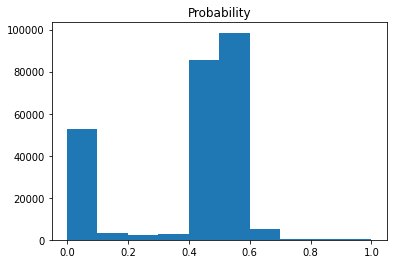

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from plots import Plots

fig1, ax1 = plt.subplots()
Plots.plot_hist(df.prob, ax=ax1, title='Probability')

In [60]:
cutoffs = np.linspace(0, 1, 10, endpoint=True)
cutoffs = (cutoffs * 10).astype(int) / 10

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1. ])